# COURSE: A deep understanding of deep learning
## SECTION: Running models on a GPU
### LECTURE: Implementation
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401
##### Modified from original code

In [ ]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

# Select the processor device

In [ ]:
## Only works on collab
## Note: To run models on a GPU you must select from the menu:
#   -> Runtime
#     -> Change runtime type
#       -> Hardware accelerator
#         -> GPU

In [ ]:
# use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Build a simple model

In [ ]:
net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
      )

# Make some data

In [ ]:
# just some random fluff
data   = torch.randn((1000,20)) # samples X features
labels = torch.randint(low=0,high=2,size=(1,1000))

# Send the model and the data to the GPU

In [ ]:
# model -> cuda:0 gpu
net.to(device)

# data -> cuda:0 gpu
data   = data.to(device)
labels = labels.to(device)

In [ ]:
data

tensor([[ 0.2070, -1.5453, -0.2766,  ...,  1.4389,  0.1884,  1.2684],
        [-0.7026,  0.4262,  0.4774,  ..., -1.8025,  1.0231,  0.8467],
        [-1.0323,  1.5163, -0.4411,  ...,  0.5583,  0.0083, -0.6346],
        ...,
        [-1.6789, -0.0676, -0.1479,  ..., -0.3478, -0.7044,  0.9970],
        [ 1.2507, -0.2502, -0.3814,  ...,  1.3686, -0.5966,  0.5638],
        [ 0.7268,  0.9651,  1.3692,  ..., -0.4952, -0.8962, -0.3075]],
       device='cuda:0')

In [ ]:
# you can also create data directly on the GPU
dataG = torch.randn((1000,20),device=device)
dataC = torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


# Getting results from the model

In [ ]:
output = net(data)

In [ ]:
output.device

device(type='cuda', index=0)

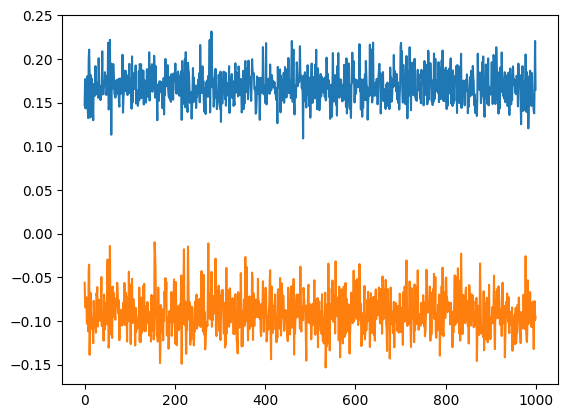

In [ ]:
# try to plot the data
# plt.plot(output.detach()); # not gonna work bc data is sitting on gpu

plt.plot(output.detach().cpu());

# Experiment: Computation time

In [ ]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000*(time.process_time() - starttime)

In [ ]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [ ]:
# time in ms
[CPUtime,GPUtime]

[9.162425000000418, 2.6796249999998523]

In [ ]:
# but maybe "sending" it to the CPU takes too much overhead?

In [ ]:
# recreate network and data
net  = nn.Sequential(nn.Linear(20,100),nn.ReLU(),nn.Linear(100,500),nn.ReLU(),nn.Linear(500,30),nn.ReLU(),nn.Linear(30,2))
data = torch.randn((1000,20))

# rerun the experiment
starttime = time.process_time()
output    = net(data).detach()
CPUtime2  = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2,CPUtime,GPUtime]

# There aren't that many gains in simple problems
# But once you get to complex models & data (CNN problems), it will help substantially

[6.00711399999998, 9.162425000000418, 2.6796249999998523]